In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
from ucimlrepo import fetch_ucirepo

myocardial_infarction_complications = fetch_ucirepo(id=579)

X = myocardial_infarction_complications.data.features
y = myocardial_infarction_complications.data.targets

print(myocardial_infarction_complications.metadata)
           
print(myocardial_infarction_complications.variables)

{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_paper': {'ID'

In [7]:
myocardial_infarction_complications.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Record ID (ID): Unique identifier. Cannot be r...,None,no
1,AGE,Feature,Integer,Age,Age of patient.,None,no
2,SEX,Feature,Binary,Sex,"0: female, 1: male",None,no
3,INF_ANAM,Feature,Categorical,None,Quantity of myocardial infarctions in the anam...,None,yes
4,STENOK_AN,Feature,Categorical,None,Exertional angina pectoris in the anamnesis. \...,None,yes
...,...,...,...,...,...,...,...
119,DRESSLER,Target,Binary,None,Dressler syndrome,None,no
120,ZSN,Target,Binary,None,Chronic heart failure,None,no
121,REC_IM,Target,Binary,None,Relapse of the myocardial infarction,None,no
122,P_IM_STEN,Target,Binary,None,Post-infarction angina,None,no


In [9]:
myocardial_infarction_complications = pd.read_csv('MI.data')


In [10]:
column_names = [
    'ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 
    'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 
    'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr_01', 'endocr_02', 
    'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 
    'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 
    'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 
    'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 
    'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 
    'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 
    'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 
    'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 
    'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD', 
    'GIPER_Na', 'Na_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 
    'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 
    'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 
    'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 
    'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 
    'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'
]


myo_infar = pd.read_csv('MI.data', header=None, names=column_names)

print(myo_infar.head())

   ID AGE  SEX INF_ANAM STENOK_AN FK_STENOK IBS_POST IBS_NASL GB SIM_GIPERT  \
0   1  77    1        2         1         1        2        ?  3          0   
1   2  55    1        1         0         0        0        0  0          0   
2   3  52    1        0         0         0        2        ?  2          0   
3   4  68    0        0         0         0        2        ?  2          0   
4   5  60    1        0         0         0        2        ?  3          0   

   ... JELUD_TAH FIBR_JELUD A_V_BLOK OTEK_LANC RAZRIV DRESSLER ZSN REC_IM  \
0  ...         0          0        0         0      0        0   0      0   
1  ...         0          0        0         0      0        0   0      0   
2  ...         0          0        0         0      0        0   0      0   
3  ...         0          0        0         0      0        0   1      0   
4  ...         0          0        0         0      0        0   0      0   

  P_IM_STEN LET_IS  
0         0      0  
1         0      0  

In [9]:
myo_infar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(13), int64(1), object(110)
memory usage: 1.6+ MB


### Overview of the Dataset Structure:

Columns: 124 (14 are numerical, while 110 are categorical or encoded as objects).

Rows: 1699 observations.

##### Features:

The features represent clinical and demographic data about patients, their history of myocardial infarction, and observed outcomes.

##### Demographics:

Age: Represents the age of the patient, critical for analyzing age-based risk factors.

Sex: Indicates the biological sex (1=Male, 0=Female). Gender differences can influence heart disease outcomes.

##### Medical History:

INF_ANAM: Previous history of myocardial infarction. Helps assess recurring cases.

STENOK_AN: Indicates the presence of angina pectoris.

FK_STENOK: Functional class of angina, ranging from mild to severe.

SIM_GIPERT: Simultaneous hypertension (1=Yes, 0=No). Tracks patients with elevated blood pressure.

DLIT_AG: Duration of arterial hypertension, a risk factor for heart complications.

##### Clinical Measurements:

S_AD_KBRIG and D_AD_KBRIG: Systolic and diastolic blood pressure during hospitalization, 
indicators of cardiovascular health.

ALT_BLOOD and AST_BLOOD: Liver enzyme levels, which could reflect organ stress or damage.

##### Outcome Variables:

ZSN: Presence of chronic heart failure (1=Yes, 0=No). Critical for evaluating long-term heart function.

REC_IM: Recurrence of myocardial infarction during the study period.

LET_IS: Survival status (0=Survived, 1=Deceased). The main indicator of treatment and condition success.

##### Risk Factors and Events:

RAZRIV: Cardiac rupture following myocardial infarction (1=Yes, 0=No).

DRESSLER: Dressler syndrome occurrence, a complication of infarction.

FIBR_PREDS: Pre-existing fibrillation risks.

In [11]:

print(myo_infar.describe())


                ID          SEX   FIBR_PREDS    PREDS_TAH    JELUD_TAH  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean    850.500000     0.626471     0.100000     0.011765     0.024706   
std     490.892045     0.483883     0.300088     0.107857     0.155273   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     425.750000     0.000000     0.000000     0.000000     0.000000   
50%     850.500000     1.000000     0.000000     0.000000     0.000000   
75%    1275.250000     1.000000     0.000000     0.000000     0.000000   
max    1700.000000     1.000000     1.000000     1.000000     1.000000   

        FIBR_JELUD     A_V_BLOK    OTEK_LANC       RAZRIV     DRESSLER  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean      0.041765     0.033529     0.093529     0.031765     0.044118   
std       0.200110     0.180067     0.291259     0.175425     0.205417   
min       0.000000     0.000000     0

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [15]:
myo_infar.replace('?', pd.NA, inplace=True)

In [16]:
new_column_names = {col: f"col_{idx}" for idx, col in enumerate(myo_infar.columns)}
myo_infar.rename(columns=new_column_names, inplace=True)

In [17]:
for column in myo_infar.columns:
    if myo_infar[column].dtype in ['float64', 'int64']:
        myo_infar[column].fillna(myo_infar[column].mean(), inplace=True)
    else:
        myo_infar[column].fillna(myo_infar[column].mode()[0], inplace=True)

In [19]:
myo_infar.columns = column_names

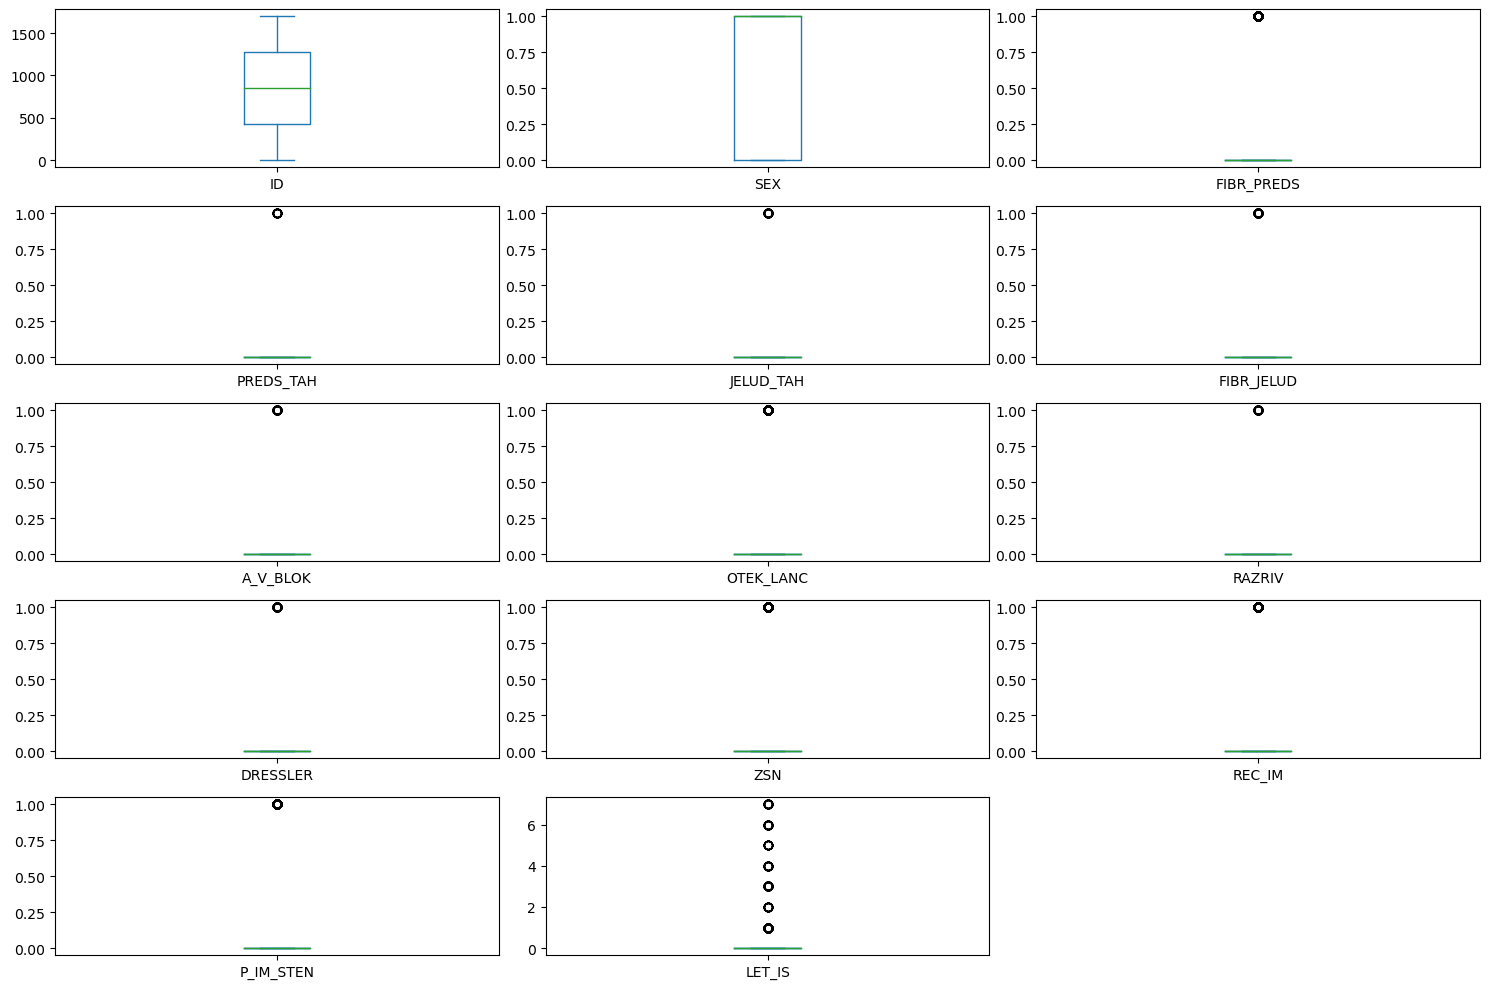

In [21]:
myo_infar.plot(kind='box', subplots=True, layout=(5, 3), sharex=False, sharey=False, figsize=(15, 10))
plt.tight_layout()
plt.show()


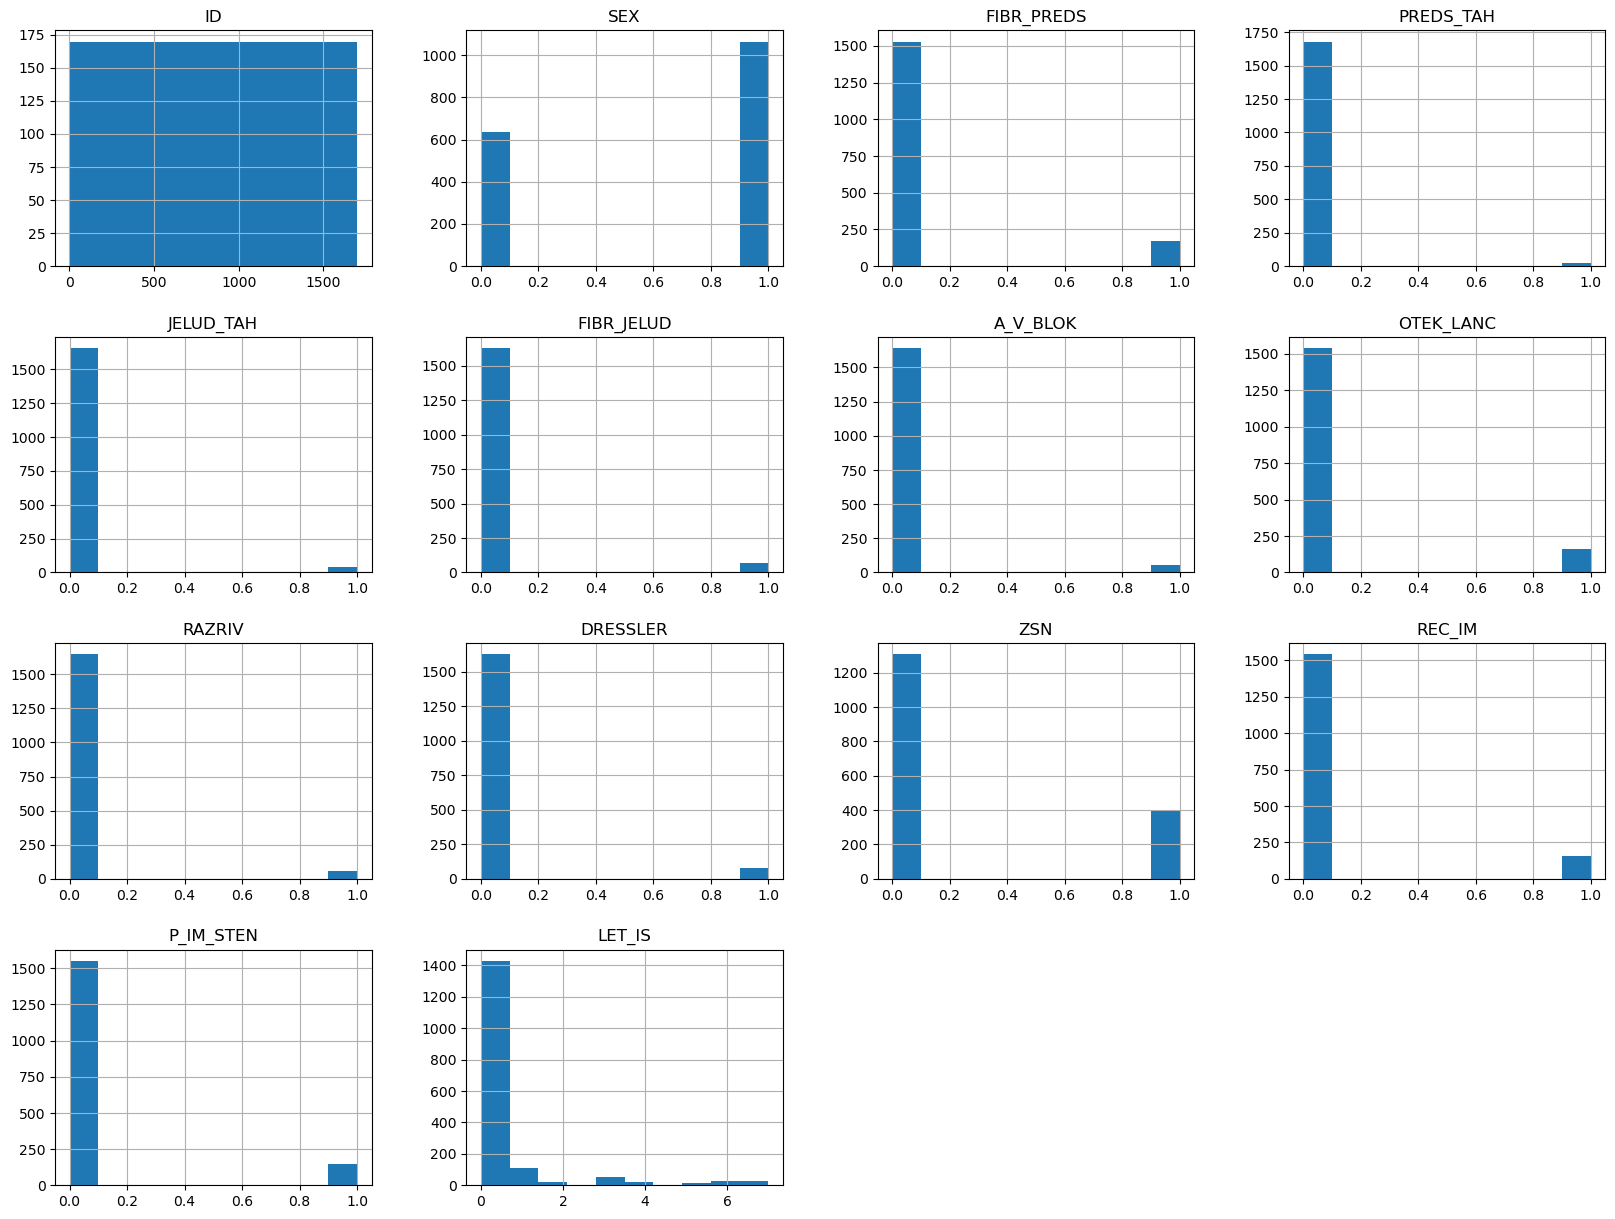

In [22]:
myo_infar.hist(figsize=(20,15))
plt.show()

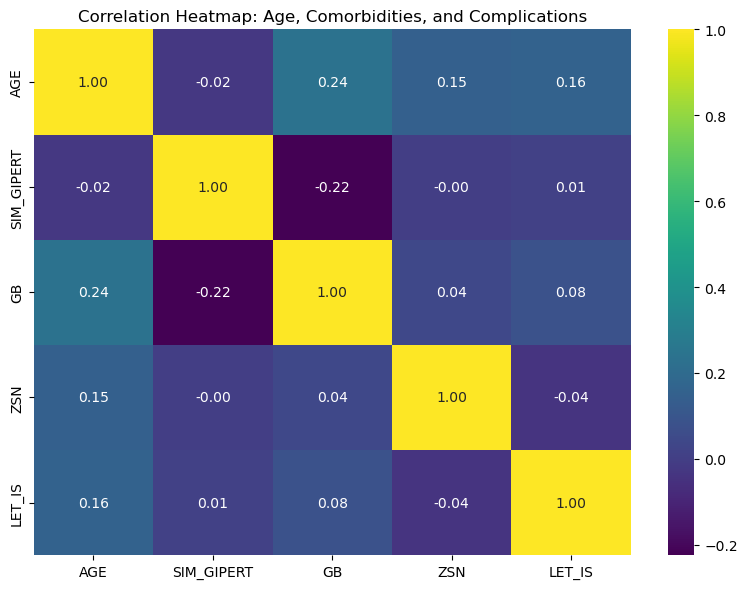

In [25]:
correlation_features = ['AGE', 'SIM_GIPERT', 'GB', 'ZSN', 'LET_IS']  
correlation_data = myo_infar[correlation_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Heatmap: Age, Comorbidities, and Complications")
plt.tight_layout()
plt.show()

 

In [26]:
from sklearn.preprocessing import StandardScaler 

In [27]:
from sklearn.model_selection import train_test_split   # split the dataset into training and testing set
from sklearn.model_selection import cross_val_score    # Perform cross validation 
from sklearn.model_selection import StratifiedKFold    # Stratify the data in each fold
from sklearn.model_selection import KFold              # Defining the number of fold in Cross-validation

# Evaluation Metrics
from sklearn.metrics import classification_report     # to get the performance measures
from sklearn.metrics import confusion_matrix          # To compute the false positives and false negatives
from sklearn.metrics import accuracy_score            # Accuracy measures

# Machine learning models
from sklearn.linear_model import LogisticRegression   # Logistics Regression Model
from sklearn.tree import DecisionTreeClassifier       # Decision Tree Model
from sklearn.neighbors import KNeighborsClassifier    # K-nearest Neighbor model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #LDA model
from sklearn.naive_bayes import GaussianNB                             # naive Bayes
from sklearn.svm import SVC                                            # Support Vector Machine

In [28]:
data_array=myo_infar.values
X=data_array[:, 0:8]
Y=data_array[:,8]
print(X.shape)
print(Y.shape)

(1700, 8)
(1700,)


In [29]:
X = np.where(X == '?', np.nan, X)

In [30]:
rescaledX = StandardScaler().fit_transform(X)

In [31]:
print(len(rescaledX), len(Y))


1700 1700


In [32]:
rescaledX, Y = rescaledX[:min(len(rescaledX), len(Y))], Y[:min(len(rescaledX), len(Y))]


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX, Y, test_size=0.2)


In [34]:
X_train.shape

(1360, 8)

In [35]:
X_test.shape

(340, 8)

In [36]:
Y_train.shape

(1360,)

In [37]:
Y_test.shape

(340,)

In [81]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

myo1 = myo1.replace('?', np.nan)


X = myo1.drop(['LET_IS'], axis=1)  
y = (myo1['LET_IS'] != 0).astype(int)  

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')




Accuracy: 0.9941176470588236
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       0.98      0.98      0.98        52

    accuracy                           0.99       340
   macro avg       0.99      0.99      0.99       340
weighted avg       0.99      0.99      0.99       340



In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = myo1.drop(['LET_IS'], axis=1).values
y = (myo1['LET_IS'] != 0).astype(int).values  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00        52

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00       340
weighted avg       1.00      1.00      1.00       340



In [75]:
def train_using_gini(X_train, X_test, y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [76]:
def train_using_gini(X_train, X_test, y_train):

    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5) 


    clf_entropy.fit(X_train, y_train) 

    return clf_entropy
 
clf_entropy = train_using_gini(X_train, X_test, y_train)
 
def prediction(X_test, clf_object):
  y_pred = clf_object.predict(X_test)
  print("Predicted values:")
  print(y_pred)
  return y_pred

def cal_accuracy(y_test, y_pred):
  print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

def prediction(X_test, clf_object):
  y_pred = clf_object.predict(X_test)
  print("Predicted values:")
  print(y_pred)
  return y_pred

def cal_accuracy(y_test, y_pred):
  print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
  print("Report : ", classification_report(y_test, y_pred))
 
 

In [77]:
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Accuracy :  100.0


In [78]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[288   0]
 [  0  52]]


In [79]:
print("Report : ", classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00        52

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00       340
weighted avg       1.00      1.00      1.00       340



In [80]:
from sklearn import tree

def plot_decision_tree(clf_object, feature_names, class_names):
  plt.figure(figsize=(15, 10))
  plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
  plt.show()

In [64]:
feature_names = [f'X{i+1}' for i in range(X_train.shape[1])]


In [67]:
def train_using_gini(X_train, X_test, y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [68]:
def train_using_gini(X_train, X_test, y_train):

    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5) 



    clf_entropy.fit(X_train, y_train) 

    return clf_entropy
 
clf_entropy = train_using_gini(X_train, X_test, y_train)
 


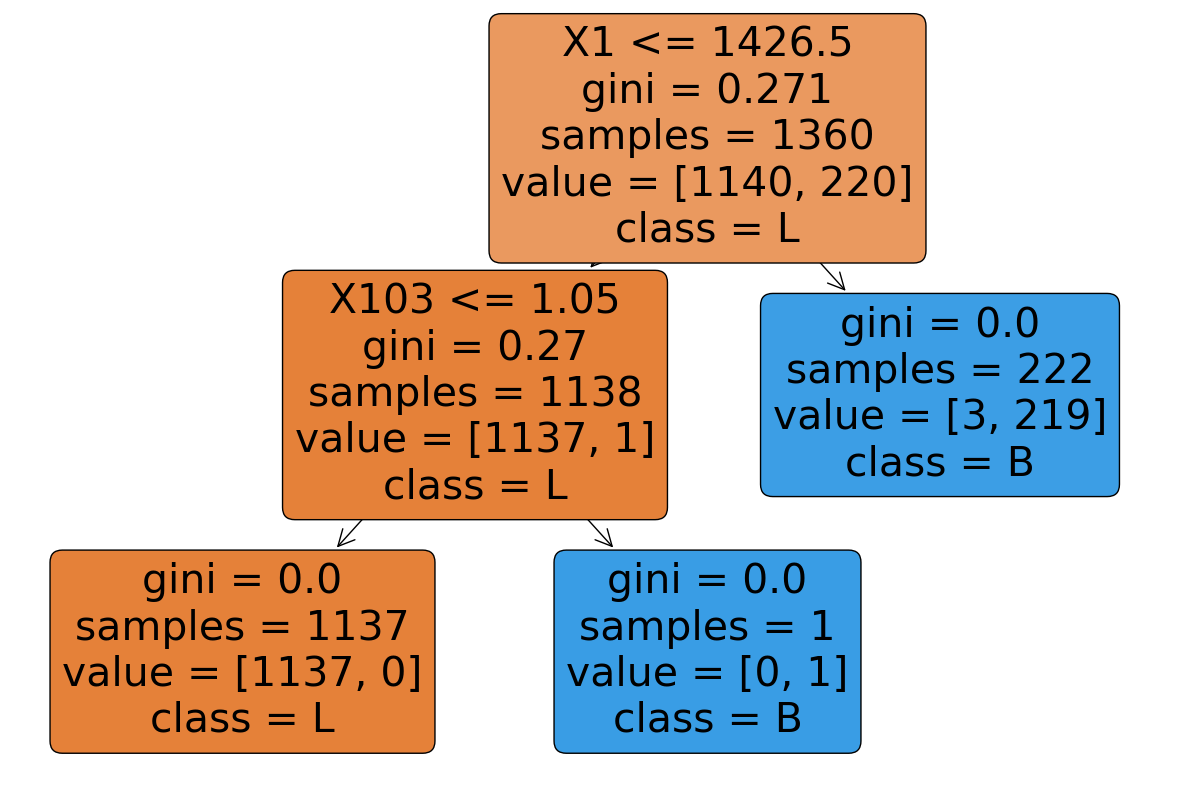

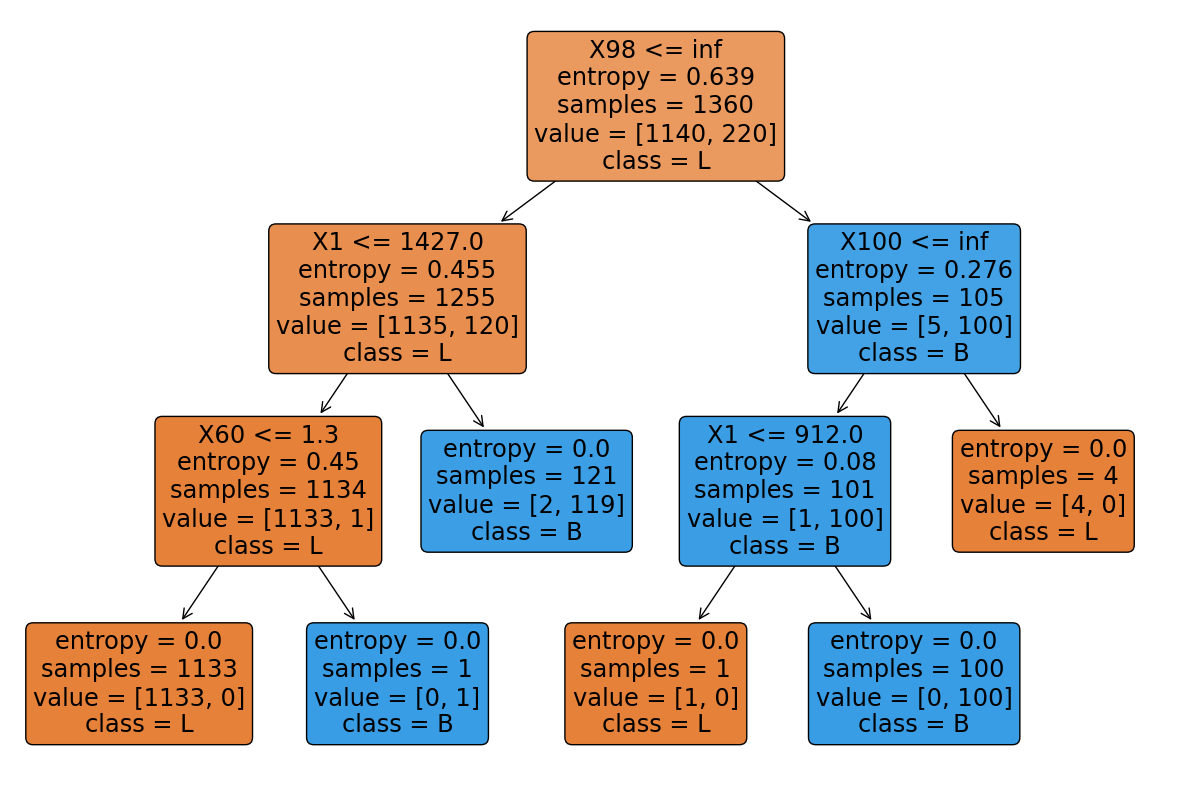

In [72]:
from sklearn.tree import plot_tree

def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

try:
    clf_gini = train_using_gini(X_train, y_train)
    clf_entropy = train_using_entropy(X_train, y_train)
except NameError as e:
    print(f"Error in training the model: {e}")
    clf_gini, clf_entropy = None, None

if clf_gini is not None and clf_entropy is not None:
    feature_names = [f'X{i+1}' for i in range(X_train.shape[1])]
    class_names = ['L', 'B', 'R']  

    plot_decision_tree(clf_gini, feature_names, class_names)
    plot_decision_tree(clf_entropy, feature_names, class_names)
else:
    print("Classifier training failed, decision trees cannot be plotted.")


In [70]:
def train_using_gini(X_train, y_train):
    
    clf = DecisionTreeClassifier(criterion='gini')
    clf.fit(X_train, y_train)
    return clf

def train_using_entropy(X_train, y_train):
    
    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(X_train, y_train)
    return clf


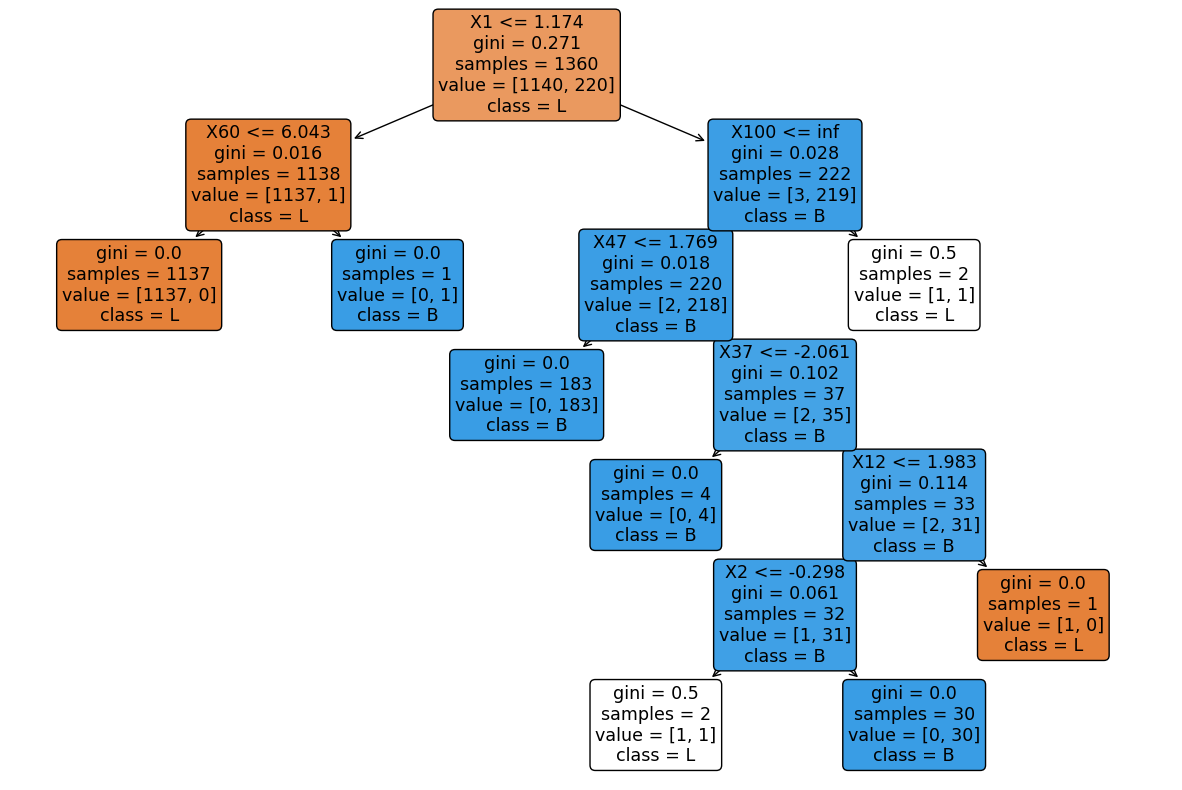

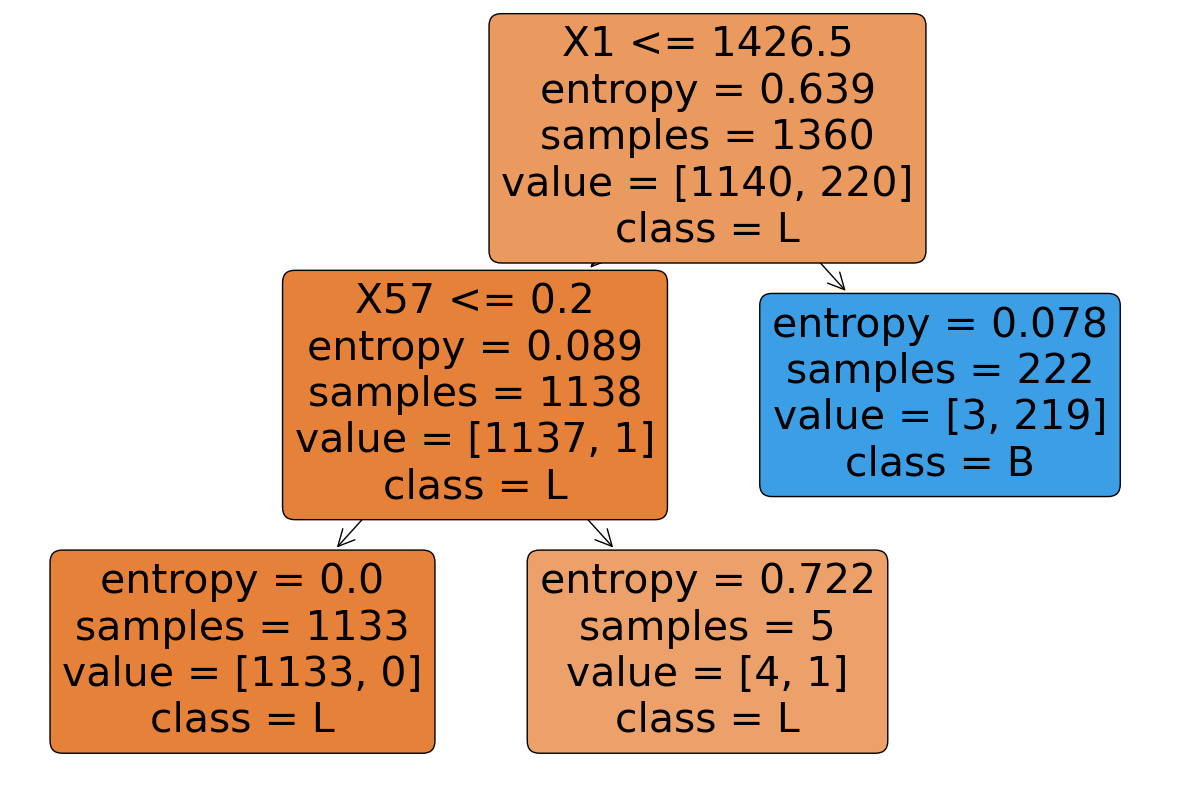

In [71]:
feature_names = [f'X{i+1}' for i in range(X_train.shape[1])]
class_names = ['L', 'B', 'R'] 

plot_decision_tree(clf_gini, feature_names, class_names)
plot_decision_tree(clf_entropy, feature_names, class_names)


In [82]:
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


label_encoder = LabelEncoder()


x_categorical = myo1.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = myo1.select_dtypes(exclude=['object'])


x_combined = pd.concat([x_numerical.reset_index(drop=True), x_categorical.reset_index(drop=True)], axis=1)


x_combined.columns = x_combined.columns.astype(str)


imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x_combined)


regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)


regressor.fit(x, y)


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(x)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.9868697478991597
Mean Squared Error: 0.0
R-squared: 1.0


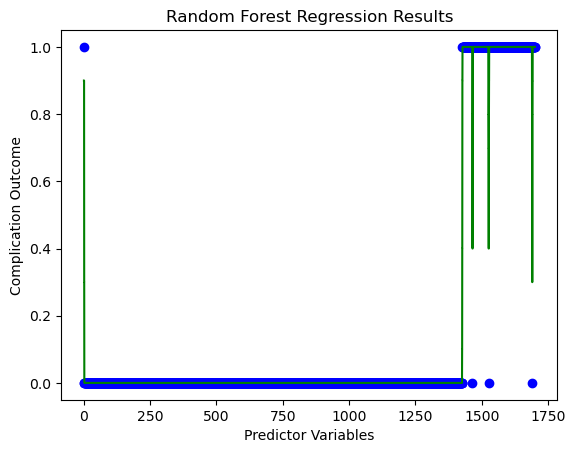

In [100]:
X_single_feature = X[:, 0].reshape(-1, 1) 

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_single_feature, y)

X_grid = np.arange(min(X_single_feature), max(X_single_feature), 0.01).reshape(-1, 1)

plt.scatter(X_single_feature, y, color='blue')  
plt.plot(X_grid, regressor.predict(X_grid), color='green')  

plt.title("Random Forest Regression Results")
plt.xlabel('Predictor Variables')
plt.ylabel('Complication Outcome')
plt.show()


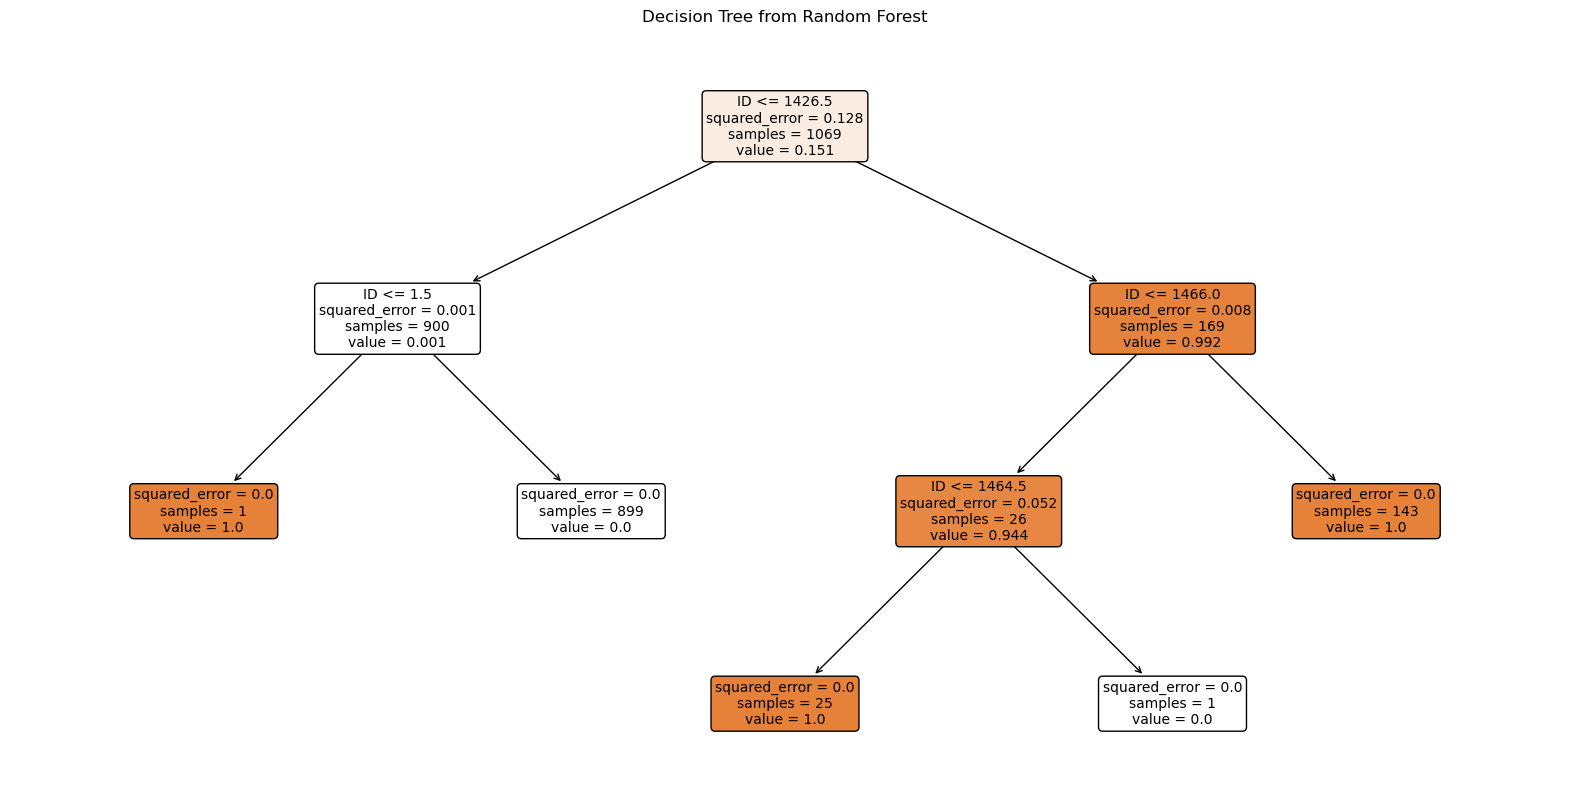

In [98]:
from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=myo1.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()
